In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hello Soft Clustering (GMM)

In [2]:
data = np.array([[1, 2], [3, 3], [2, 2], [8, 8], [6, 6], [7, 7], [-3, -3], [-2, -4], [-7, -7]])

In [3]:
def pdf(value, centroid, covariance):
    dim = centroid.shape[0]
    
    return np.exp(-0.5 * (value - centroid).dot(np.linalg.pinv(covariance)).dot((value - centroid).T)) \
            / ((2 * np.pi)**(dim / 2) * np.linalg.det(covariance)**0.5)

In [4]:
def loglike(data, weight, centroid, covariance):
    sm = 0
    for i in range(data.shape[0]):
        prob = 0
        for j in range(centroid.shape[0]):
            if abs(np.sum(covariance[j, :, :])) < 1e-10:
                continue
            prob += weight[j] * pdf(data[i, :], centroid[j, :], covariance[j, :, :])
        sm += np.log(prob)
    return sm

In [5]:
def expectation(data, weight, centroid, covariance):
    prob = np.zeros((data.shape[0], centroid.shape[0]))
    for i in range(data.shape[0]):
        for j in range(centroid.shape[0]):
            prob[i, j] = pdf(data[[i], :], centroid[[j], :], covariance[j, :, :]) * weight[j]
        prob[i, :] = prob[i, :] / np.sum(prob[i, :])
    return prob

In [6]:
def maximization(data, prob, centroid, covariance):
    dim = centroid.shape[0]
    new_weight = np.sum(prob, axis=0) / data.shape[0]
    new_centroid = (np.dot(data.T, prob) / np.sum(prob, axis=0)).T
    new_covariance = np.zeros((new_centroid.shape[0], new_centroid.shape[1], new_centroid.shape[1]))
    for i in range(new_covariance.shape[0]):
        diff = data - new_centroid[i, :]
        new_covariance[i, :, :] = np.dot(prob[:, i] * diff.T, diff) / np.sum(prob[:, i])
        new_covariance[i, :, :] = new_covariance[i, :, :] * np.identity(new_covariance.shape[1])
    return (new_weight, new_centroid, new_covariance)

In [7]:
def get_bound(centroid, covariance):
    point1 = centroid
    point2 = [centroid[0] + covariance[0, 0]**0.5, centroid[1]]
    point3 = [centroid[0] - covariance[0, 0]**0.5, centroid[1]]
    point4 = [centroid[0], centroid[1] + covariance[1, 1]**0.5]
    point5 = [centroid[0], centroid[1] - covariance[1, 1]**0.5]
    return np.array([point1, point2, point3, point4, point5])

In [8]:
def plot_result(data, centroid, covariance):
    plt.scatter(data[:, 0], data[:, 1], color="Black")
#     plt.scatter(centroid[:, 0], centroid[:, 1], color="Red", marker='x')
    dpoint = get_bound(centroid[0, :], covariance[0, :, :])
    plt.scatter(dpoint[:, 0], dpoint[:, 1], color="Red", marker='x')
    dpoint = get_bound(centroid[1, :], covariance[1, :, :])
    plt.scatter(dpoint[:, 0], dpoint[:, 1], color="Green", marker='x')
    if centroid.shape[1] > 2:
        dpoint = get_bound(centroid[2, :], covariance[2, :, :])
        plt.scatter(dpoint[:, 0], dpoint[:, 1], color="Blue", marker='x')
    plt.show()

In [9]:
def print_result(weight, centroid, covariance, prob):
    for i in range(weight.shape[0]):
        print("Weight " + str(i+1) + ":", weight[i])
        print("Centroid " + str(i+1) + ":", centroid[i, :])
        print("Covariance " + str(i+1) + ":", covariance[i, :, :], sep='\n')
#     print("Probability:")
#     for i in range(prob.shape[0]):
#         print(*prob[i, :], sep = '\t')
    print("Log Likelihood:", loglike(data, weight, centroid, covariance))

## T1 + T2

In [10]:
centroid = np.array([[3, 3], [2, 2], [-3, -3]])

covariance = np.zeros((centroid.shape[0], data.shape[1], data.shape[1]))
for i in range(covariance.shape[0]):
    covariance[i, :, :] = np.identity(covariance.shape[1])

weight = np.ones((centroid.shape[0],))
weight /= np.sum(weight)

log_like = []

Start:
Weight 1: 0.3333333333333333
Centroid 1: [3 3]
Covariance 1:
[[1. 0.]
 [0. 1.]]
Weight 2: 0.3333333333333333
Centroid 2: [2 2]
Covariance 2:
[[1. 0.]
 [0. 1.]]
Weight 3: 0.3333333333333333
Centroid 3: [-3 -3]
Covariance 3:
[[1. 0.]
 [0. 1.]]
Log Likelihood: -93.17390123755949


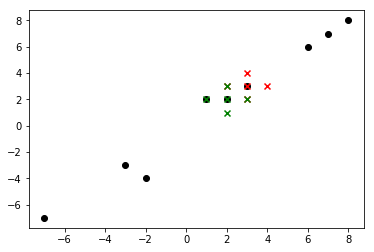

In [11]:
print("Start:")
prob = expectation(data, weight, centroid, covariance)
print_result(weight, centroid, covariance, prob)
plot_result(data, centroid, covariance)
log_like.append(loglike(data, weight, centroid, covariance))

>> Iteration 1 <<
Weight 1: 0.45757241940119375
Centroid 1: [5.78992692 5.81887265]
Covariance 1:
[[4.53619412 0.        ]
 [0.         4.28700611]]
Weight 2: 0.20909424706571342
Centroid 2: [1.67718211 2.14523106]
Covariance 2:
[[0.51645579 0.        ]
 [0.         0.13152618]]
Weight 3: 0.33333333353309275
Centroid 3: [-4.         -4.66666666]
Covariance 3:
[[4.66666668 0.        ]
 [0.         2.88888891]]
Log Likelihood: -39.72599315621764


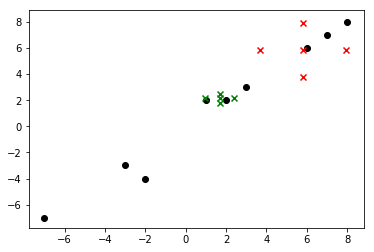

------------------------------------------------------------------
>> Iteration 2 <<
Weight 1: 0.40711618315944753
Centroid 1: [6.27176215 6.27262711]
Covariance 1:
[[2.94672736 0.        ]
 [0.         2.93847196]]
Weight 2: 0.25954960846072456
Centroid 2: [1.72091544 2.14764812]
Covariance 2:
[[0.49649261 0.        ]
 [0.         0.12584815]]
Weight 3: 0.3333342083798279
Centroid 3: [-3.99998589 -4.6666488 ]
Covariance 3:
[[4.66673088 0.        ]
 [0.         2.88900236]]
Log Likelihood: -38.805731980577036


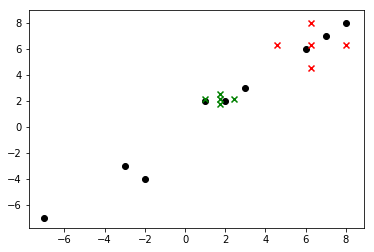

------------------------------------------------------------------
>> Iteration 3 <<
Weight 1: 0.3607090863887185
Centroid 1: [6.6962644  6.69629468]
Covariance 1:
[[1.73961067 0.        ]
 [0.         1.73929602]]
Weight 2: 0.3059567726926512
Centroid 2: [1.91071238 2.27383436]
Covariance 2:
[[0.62898406 0.        ]
 [0.         0.1988491 ]]
Weight 3: 0.33333414091863034
Centroid 3: [-3.99998673 -4.6666501 ]
Covariance 3:
[[4.66672942 0.        ]
 [0.         2.88899545]]
Log Likelihood: -36.512976311414334


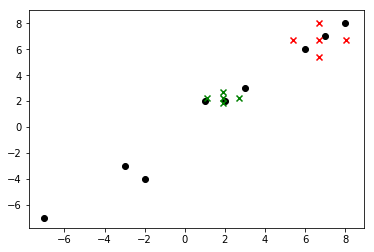

------------------------------------------------------------------
>> Iteration 4 <<
Weight 1: 0.33343329622786333
Centroid 1: [6.99880044 6.99880047]
Covariance 1:
[[0.67126545 0.        ]
 [0.         0.67126513]]
Weight 2: 0.33323235801246504
Centroid 2: [1.99970287 2.33313462]
Covariance 2:
[[0.66656629 0.        ]
 [0.         0.22215595]]
Weight 3: 0.33333434575967164
Centroid 3: [-3.99998427 -4.66664635]
Covariance 3:
[[4.66673456 0.        ]
 [0.         2.88901608]]
Log Likelihood: -35.24973824462015


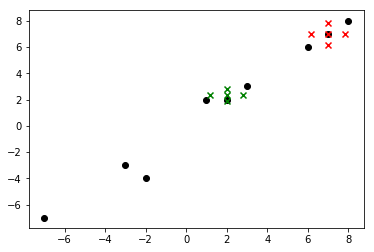

------------------------------------------------------------------
>> Iteration 5 <<
Weight 1: 0.3333333333499071
Centroid 1: [7. 7.]
Covariance 1:
[[0.66666667 0.        ]
 [0.         0.66666667]]
Weight 2: 0.3333321836836348
Centroid 2: [2.00000294 2.33333444]
Covariance 2:
[[0.66666595 0.        ]
 [0.         0.22222259]]
Weight 3: 0.3333344829664581
Centroid 3: [-3.99998224 -4.66664363]
Covariance 3:
[[4.66674252 0.        ]
 [0.         2.88903279]]
Log Likelihood: -35.24966026720071


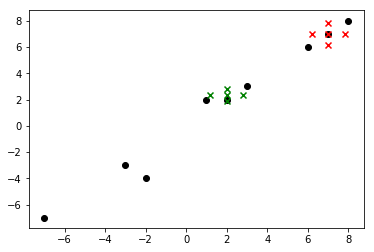

------------------------------------------------------------------
Log Likelihood versus Iteration


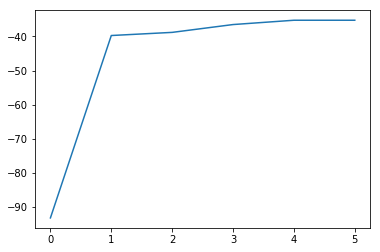

In [12]:
for i in range(1, 6):
    (weight, centroid, covariance) = maximization(data, prob, centroid, covariance)
    prob = expectation(data, weight, centroid, covariance)
    log_like.append(loglike(data, weight, centroid, covariance))
    
    print(">> Iteration {:d} <<".format(i))
    print_result(weight, centroid, covariance, prob)
    plot_result(data, centroid, covariance)
    print("------------------------------------------------------------------")

print("Log Likelihood versus Iteration")
plt.plot(np.arange(len(log_like)), log_like)
plt.show()

## T3 + T4

In [13]:
centroid = np.array([[3, 3], [-3, -3]])

covariance = np.zeros((centroid.shape[0], data.shape[1], data.shape[1]))
for i in range(covariance.shape[0]):
    covariance[i, :, :] = np.identity(covariance.shape[1])

weight = np.ones((centroid.shape[0],))
weight /= np.sum(weight)

log_like = []

Start:
Weight 1: 0.5
Centroid 1: [3 3]
Covariance 1:
[[1. 0.]
 [0. 1.]]
Weight 2: 0.5
Centroid 2: [-3 -3]
Covariance 2:
[[1. 0.]
 [0. 1.]]
Log Likelihood: -93.27921820745591


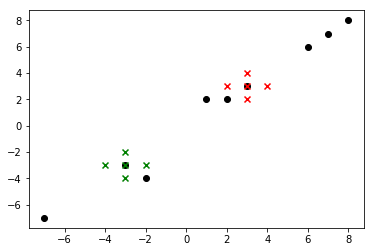

In [14]:
print("Start:")
prob = expectation(data, weight, centroid, covariance)
print_result(weight, centroid, covariance, prob)
plot_result(data, centroid, covariance)
log_like.append(loglike(data, weight, centroid, covariance))

>> Iteration 1 <<
Weight 1: 0.6666666649702521
Centroid 1: [4.50000001 4.66666667]
Covariance 1:
[[6.91666665 0.        ]
 [0.         5.88888889]]
Weight 2: 0.3333333350297478
Centroid 2: [-3.99999997 -4.66666663]
Covariance 2:
[[4.66666677 0.        ]
 [0.         2.8888891 ]]
Log Likelihood: -46.29196106295049


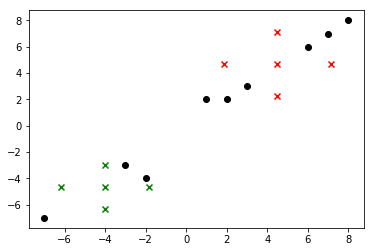

------------------------------------------------------------------
>> Iteration 2 <<
Weight 1: 0.6666943621060054
Centroid 1: [4.49961311 4.66620178]
Covariance 1:
[[6.91944755 0.        ]
 [0.         5.89275124]]
Weight 2: 0.33330563789399464
Centroid 2: [-3.99993241 -4.66651231]
Covariance 2:
[[4.66806942 0.        ]
 [0.         2.89103318]]
Log Likelihood: -46.291959481294654


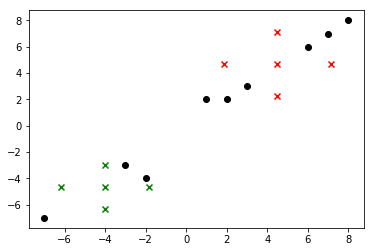

------------------------------------------------------------------
>> Iteration 3 <<
Weight 1: 0.6666945259520648
Centroid 1: [4.49961084 4.66619903]
Covariance 1:
[[6.91946372 0.        ]
 [0.         5.8927741 ]]
Weight 2: 0.33330547404793515
Centroid 2: [-3.99993206 -4.66651141]
Covariance 2:
[[4.66807754 0.        ]
 [0.         2.89104566]]
Log Likelihood: -46.29195948124025


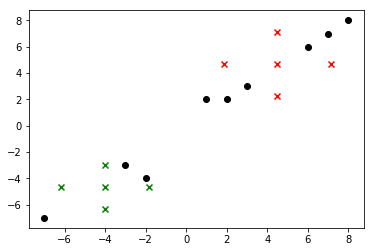

------------------------------------------------------------------
>> Iteration 4 <<
Weight 1: 0.6666945269275435
Centroid 1: [4.49961083 4.66619902]
Covariance 1:
[[6.91946381 0.        ]
 [0.         5.89277424]]
Weight 2: 0.33330547307245656
Centroid 2: [-3.99993205 -4.6665114 ]
Covariance 2:
[[4.66807758 0.        ]
 [0.         2.89104573]]
Log Likelihood: -46.29195948124025


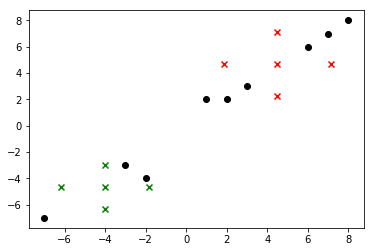

------------------------------------------------------------------
>> Iteration 5 <<
Weight 1: 0.6666945269333657
Centroid 1: [4.49961083 4.66619902]
Covariance 1:
[[6.91946381 0.        ]
 [0.         5.89277424]]
Weight 2: 0.33330547306663433
Centroid 2: [-3.99993205 -4.6665114 ]
Covariance 2:
[[4.66807759 0.        ]
 [0.         2.89104573]]
Log Likelihood: -46.291959481240255


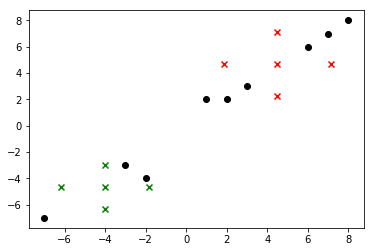

------------------------------------------------------------------
Log Likelihood versus Iteration


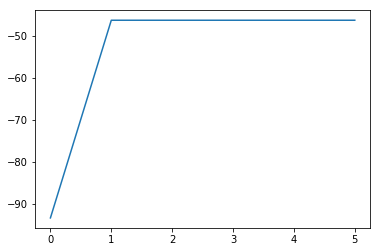

In [15]:
for i in range(1, 6):
    (weight, centroid, covariance) = maximization(data, prob, centroid, covariance)
    prob = expectation(data, weight, centroid, covariance)
    log_like.append(loglike(data, weight, centroid, covariance))
    
    print(">> Iteration {:d} <<".format(i))
    print_result(weight, centroid, covariance, prob)
    plot_result(data, centroid, covariance)
    print("------------------------------------------------------------------")

print("Log Likelihood versus Iteration")
plt.plot(np.arange(len(log_like)), log_like)
plt.show()

# The Face Database

In [16]:
import scipy.io
from skimage import img_as_float

In [17]:
data = scipy.io.loadmat("facedata.mat")['facedata']

In [18]:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i, j] = img_as_float(data[i, j])

## T5

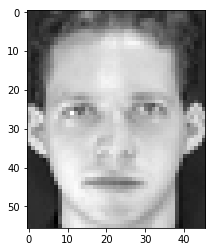

In [19]:
plt.imshow(data[0, 0], cmap='gray')

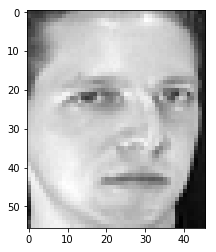

In [20]:
plt.imshow(data[0, 1], cmap='gray')

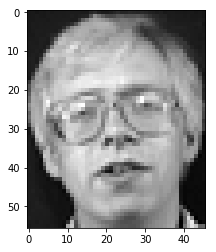

In [21]:
plt.imshow(data[1, 0], cmap='gray')

In [22]:
print('[0, 0] vs [0, 1]:', np.sum((data[0, 0] - data[0, 1])**2)**0.5)
print('[0, 0] vs [1, 0]:', np.sum((data[0, 0] - data[1, 0])**2)**0.5)

[0, 0] vs [0, 1]: 10.037616294165492
[0, 0] vs [1, 0]: 8.173295099737281


## T6

In [23]:
def similarity(T, D):
    A = np.zeros((len(T), len(D)))
    for i in range(len(T)):
        for j in range(len(D)):
            A[i, j] = np.sum((T[i] - D[j])**2)**0.5
    return A

In [24]:
T = data[:, :3].flatten()
D = data[:, 3:].flatten()

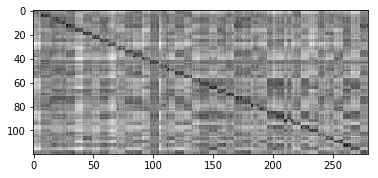

In [63]:
sim = similarity(T, D)
plt.imshow(sim, cmap='gray')
plt.show()

## T8

In [26]:
def verify(sim, t):
    tp = fp = tn = fn = 0
    for i in range(sim.shape[1]):
        for j in range(0, sim.shape[0], 3):
            dist = min(sim[j, i], sim[j+1, i], sim[j+2, i])
            
            if i // 7 == j // 3:
                if dist < t:
                    tp += 1
                else:
                    fn += 1
            else:
                if dist < t:
                    fp += 1
                else:
                    tn += 1
                    
    return (fp / (fp + tn), tp / (tp + fn))

In [27]:
print(" False Alarm Rate  |  True Positive Rate")
verify(sim, 10)

 False Alarm Rate  |  True Positive Rate


(0.4564102564102564, 0.9964285714285714)

## T9 + T10

In [28]:
def plot_roc(sim):
    graph = []

    min_t = np.min(sim)
    max_t = np.max(sim)

    print("Minimum threshold:", min_t)
    print("Maximum threshold:", max_t)
    print("---------------------------------------------")

    for i in range(1000):
        graph.append(verify(sim, ((999-i)*min_t + i*max_t) / 999))
        
    graph.sort()

    for each in graph:
        if each[0] <= 1 - each[1]:
            left = each
        if each[0] > 1 - each[1]:
            right = each
            break

    # solve equation
    m = (right[1] - left[1]) / (right[0] - left[0])
    eer = (right[1] - m*right[0] - 1) / (- 1 - m)

    print("EER:", eer)
    print("---------------------------------------------")
    
    for each in graph:
        if each[0] <= 0.001:
            left = each
        if each[0] > 0.001:
            right = each
            break

    # solve equation
    m = (right[1] - left[1]) / (right[0] - left[0])
    rec = right[1] - m*(right[0] - 0.001)
    
    print("Recall at 0.1% False Alarm Rate:", rec)
    print("---------------------------------------------")
        
    plt.plot([each[0] for each in graph], [each[1] for each in graph])
    plt.xlabel("False Alarm Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim((-0.1, 1.1))
    plt.ylim((-0.1, 1.1))
    plt.show()

Minimum threshold: 1.7420153428787781
Maximum threshold: 17.541726165424688
---------------------------------------------
EER: 0.08962406015037594
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.5461428571428572
---------------------------------------------


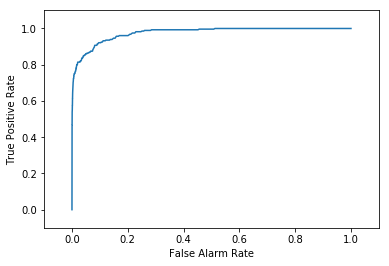

In [29]:
plot_roc(sim)

# Principle Component Analysis (PCA)

## T11

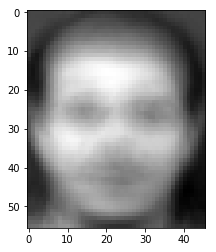

In [65]:
mean_face = np.zeros(data[0, 0].shape)
for each in T:
    mean_face = mean_face + each
mean_face = mean_face / len(T)
plt.imshow(mean_face, cmap='gray')

## T15
Please note that the dimension of Gram matrix is (training_size, feature_size), which is the transpose of what in the slide.

In [68]:
normal_T = np.zeros((T.shape[0], np.size(T[0])))

In [69]:
for i in range(T.shape[0]):
    normal_T[i, :] = (T[i] - mean_face).flatten()

In [70]:
gram = np.dot(normal_T, normal_T.T)
gram

array([[ 56.33012969,  28.21736217,  39.73820838, ...,  -2.73770601,
          7.40586172,   6.42849481],
       [ 28.21736217, 100.85833551,  43.4639645 , ...,  13.2689267 ,
          7.04302115,  10.33811867],
       [ 39.73820838,  43.4639645 ,  74.80547969, ...,   5.6783696 ,
          7.89815417,   6.12357081],
       ...,
       [ -2.73770601,  13.2689267 ,   5.6783696 , ...,  48.41169781,
         21.72455428,  33.05010163],
       [  7.40586172,   7.04302115,   7.89815417, ...,  21.72455428,
         42.49468102,  36.38493426],
       [  6.42849481,  10.33811867,   6.12357081, ...,  33.05010163,
         36.38493426,  52.21851698]])

In [77]:
eig_val, eig_vec = np.linalg.eigh(gram)

In [78]:
eig_val = eig_val[::-1]
eig_vec = eig_vec[:, ::-1]
eig_vec

array([[ 0.07820028, -0.08144841,  0.16838572, ..., -0.03284951,
         0.01171851, -0.09128709],
       [ 0.15633363, -0.06891888,  0.00607299, ..., -0.00712131,
         0.00347436, -0.09128709],
       [ 0.14076739, -0.04460943,  0.08922514, ...,  0.03802993,
         0.01301747, -0.09128709],
       ...,
       [ 0.03542524, -0.08254825, -0.13635891, ..., -0.01356318,
         0.00197116, -0.09128709],
       [ 0.04815903, -0.11167625, -0.06627051, ..., -0.03108812,
        -0.02639082, -0.09128709],
       [ 0.04395375, -0.12893456, -0.07990511, ...,  0.02085834,
         0.01616482, -0.09128709]])

In [79]:
while abs(eig_val[-1]) < 1e-5:
    eig_val = eig_val[:-1]
    eig_vec = eig_vec[:, :-1]

In [80]:
print(eig_val.shape)
print(eig_vec.shape)

(119,)
(120, 119)


## T16

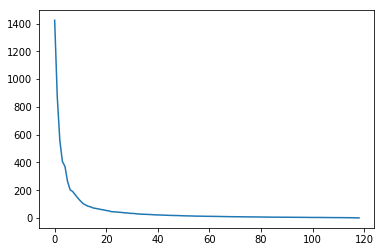

In [81]:
plt.plot(np.arange(eig_val.shape[0]), eig_val)
plt.show()

In [82]:
sm_var = np.sum(eig_val)
cm_var = 0

for i in range(eig_val.shape[0]):
    if cm_var > 0.95 * sm_var:
        print("Eigenvalue/Eigenvector used:", i)
        break
    cm_var += eig_val[i]

Eigenvalue/Eigenvector used: 64


## T17

In [83]:
eig_vec = np.dot(normal_T.T, eig_vec)

In [84]:
for i in range(eig_vec.shape[1]):
    eig_vec[:, i] = eig_vec[:, i] / np.linalg.norm(eig_vec[:, i])

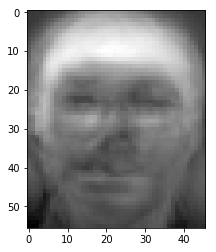

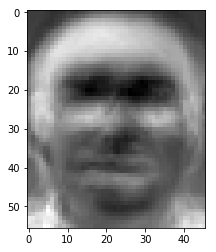

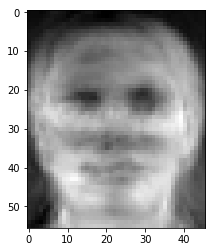

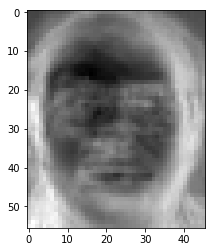

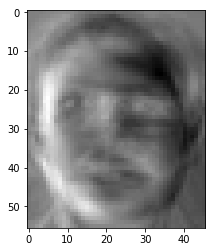

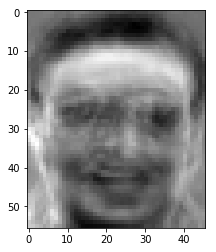

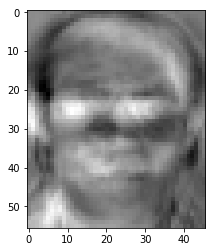

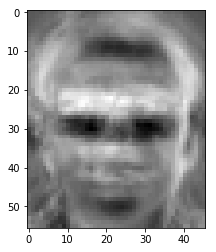

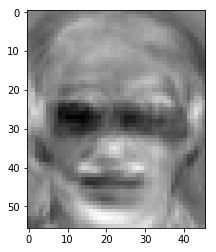

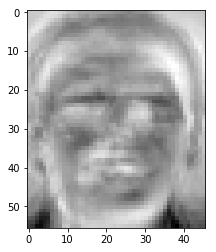

In [85]:
# eigenface
for i in range(10):
    plt.imshow(eig_vec[:, i].reshape(T[0].shape), cmap='gray')
    plt.show()

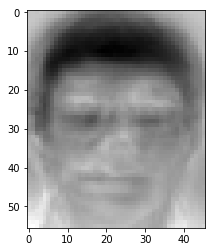

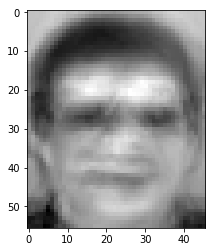

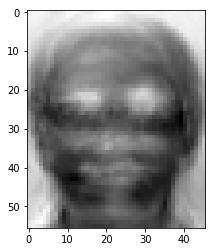

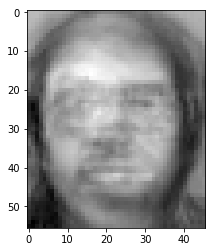

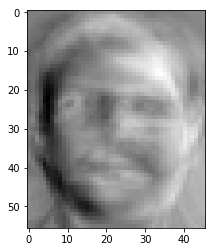

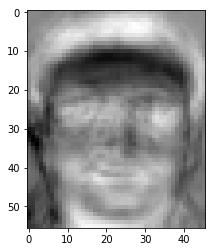

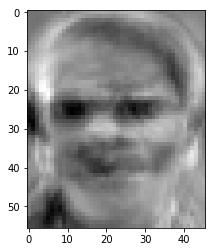

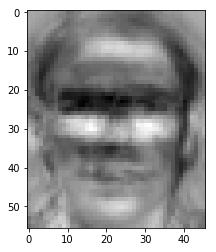

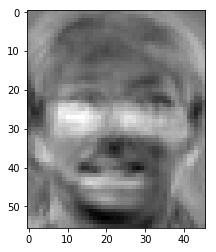

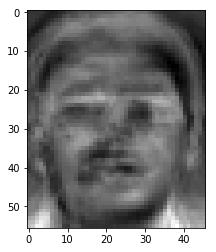

In [86]:
# inverse of same eigenface
for i in range(10):
    plt.imshow(-eig_vec[:, i].reshape(T[0].shape), cmap='gray')
    plt.show()

## T19 + T20

In [87]:
normal_D = np.zeros((D.shape[0], np.size(D[0])))

In [88]:
for i in range(D.shape[0]):
    normal_D[i, :] = (D[i] - mean_face).flatten()

----------> K = 5
Minimum threshold: 0.18946561871747186
Maximum threshold: 15.665136502000616
---------------------------------------------
EER: 0.1071428571428571
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.25357142857142856
---------------------------------------------


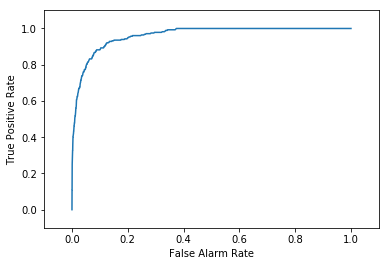

----------> K = 6
Minimum threshold: 0.20304717361245198
Maximum threshold: 15.736685198553841
---------------------------------------------
EER: 0.09389880952380952
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.3491428571428571
---------------------------------------------


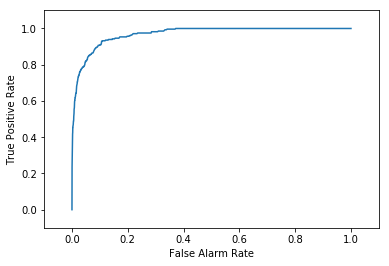

----------> K = 7
Minimum threshold: 0.21469650763319348
Maximum threshold: 15.759483537803789
---------------------------------------------
EER: 0.09285714285714286
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.4104285714285714
---------------------------------------------


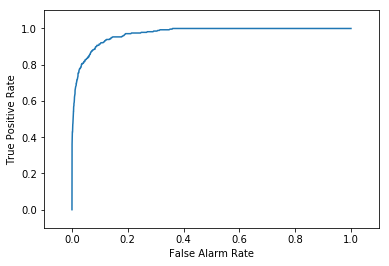

----------> K = 8
Minimum threshold: 0.26301823538737085
Maximum threshold: 15.761623825782094
---------------------------------------------
EER: 0.08578296703296703
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.40714285714285714
---------------------------------------------


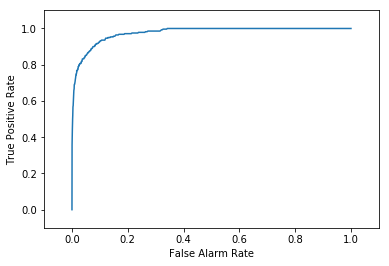

----------> K = 9
Minimum threshold: 0.2798449793645452
Maximum threshold: 15.7616488500126
---------------------------------------------
EER: 0.08070054945054947
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.44985714285714284
---------------------------------------------


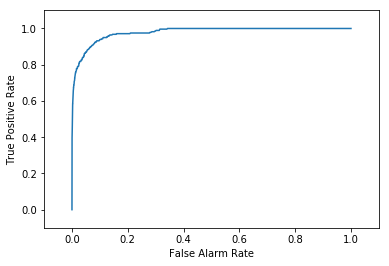

----------> K = 10
Minimum threshold: 0.28033892804663435
Maximum threshold: 15.820383628019469
---------------------------------------------
EER: 0.07857142857142863
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.5175714285714286
---------------------------------------------


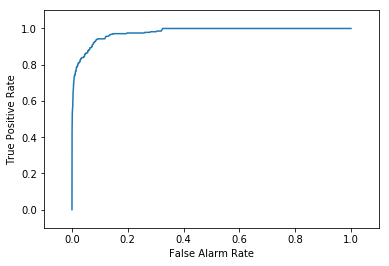

----------> K = 11
Minimum threshold: 0.28063526278379713
Maximum threshold: 15.848652319768338
---------------------------------------------
EER: 0.0783692722371968
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.5035714285714286
---------------------------------------------


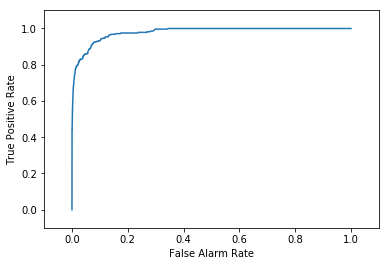

----------> K = 12
Minimum threshold: 0.2909361935111674
Maximum threshold: 15.894428501768134
---------------------------------------------
EER: 0.08505830903790088
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.5101428571428571
---------------------------------------------


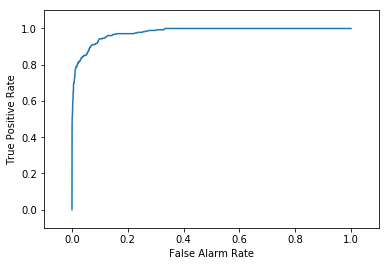

----------> K = 13
Minimum threshold: 0.310180975223069
Maximum threshold: 15.968339728766148
---------------------------------------------
EER: 0.08225806451612903
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.5175714285714286
---------------------------------------------


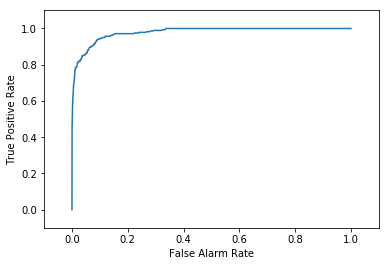

----------> K = 14
Minimum threshold: 0.33593059932563957
Maximum threshold: 15.979512611231923
---------------------------------------------
EER: 0.08214285714285718
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.5035714285714286
---------------------------------------------


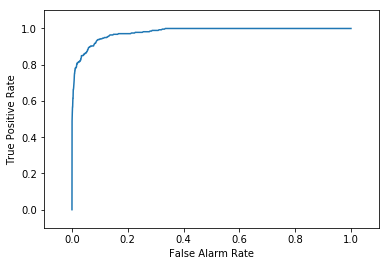

In [89]:
for k in range(5, 15):
    eig_T = np.dot(normal_T, eig_vec[:, :k])
    eig_D = np.dot(normal_D, eig_vec[:, :k])
    
    eig_T_list = [eig_T[i, :] for i in range(eig_T.shape[0])]
    eig_D_list = [eig_D[i, :] for i in range(eig_D.shape[0])]
    
    eig_sim = similarity(eig_T_list, eig_D_list)
    
    print("----------> K =", k)
    plot_roc(eig_sim)

## OT1 + OT2

In [90]:
def mse(pic1, pic2):
    if pic1.shape != pic2.shape:
        print("Wrong dimension")
        return
    
    return np.sum((pic1 - pic2)**2) / np.size(pic1)

(1, 2576)
(2576, 1)
K = 1
MSE = 0.09321198350902783


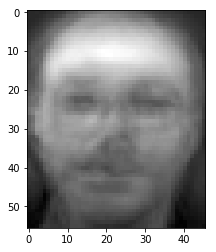

-----------------------------------
(1, 2576)
(2576, 2)
K = 2
MSE = 0.16590633234016386


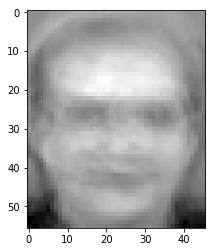

-----------------------------------
(1, 2576)
(2576, 3)
K = 3
MSE = 0.16645810812847306


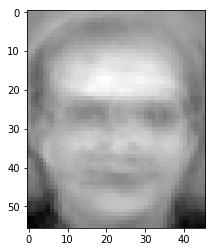

-----------------------------------
(1, 2576)
(2576, 4)
K = 4
MSE = 0.17151700367934358


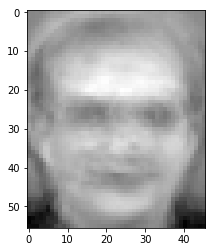

-----------------------------------
(1, 2576)
(2576, 5)
K = 5
MSE = 0.17608668533873922


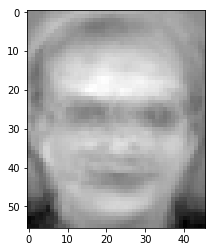

-----------------------------------
(1, 2576)
(2576, 6)
K = 6
MSE = 0.17502784064979024


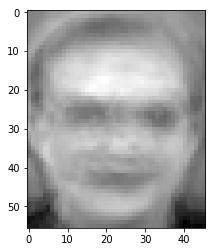

-----------------------------------
(1, 2576)
(2576, 7)
K = 7
MSE = 0.17928200020534385


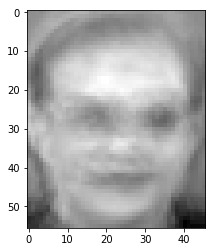

-----------------------------------
(1, 2576)
(2576, 8)
K = 8
MSE = 0.18042702979520778


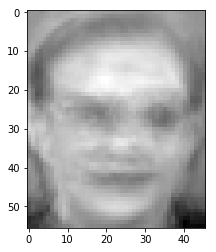

-----------------------------------
(1, 2576)
(2576, 9)
K = 9
MSE = 0.18222742449032148


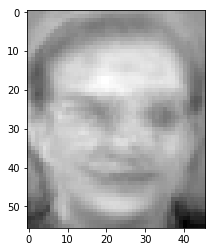

-----------------------------------
(1, 2576)
(2576, 10)
K = 10
MSE = 0.19306370820951332


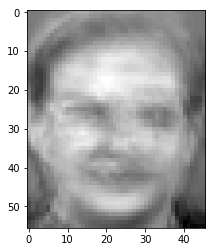

-----------------------------------
(1, 2576)
(2576, 119)
K = 119
MSE = 0.19560405542872134


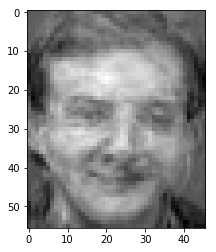

-----------------------------------


In [91]:
img = data[2, 0]

x = []
y = []

for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 119]:
    # compress
    new_img = img - mean_face
    new_img = np.reshape(img.flatten(), (1, np.size(img)))
    print(new_img.shape)
    print(eig_vec[:,:k].shape)
    new_img = np.dot(new_img, eig_vec[:, :k])
    
    # reconstruct
    new_img = np.dot(new_img, eig_vec[:, :k].T)
    new_img = np.reshape(new_img, mean_face.shape)
    new_img = new_img + mean_face
    
    x.append(k)
    y.append(mse(img, new_img))
    
    print("K =", k)
    print("MSE =", y[-1])
    
    plt.imshow(new_img, cmap='gray')
    plt.show()
    
    print("-----------------------------------")

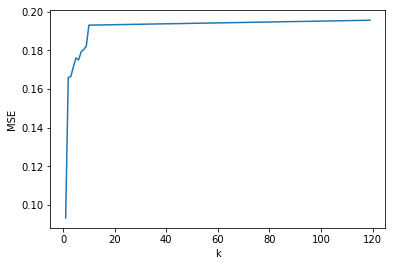

In [92]:
plt.plot(x, y)
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()

## T22

In [117]:
eig_T = np.dot(normal_T, eig_vec[:, :80])
eig_D = np.dot(normal_D, eig_vec[:, :80])

In [118]:
all_mean = np.zeros((eig_T.shape[1], 1))
class_mean = [np.zeros((eig_T.shape[1], 1)) for i in range(eig_T.shape[0] // 3)]

In [119]:
for i in range(eig_T.shape[0]):
    all_mean[:, 0] += eig_T[i, :] / eig_T.shape[0]
    class_mean[i//3][:, 0] += eig_T[i, :] / 3

In [120]:
sb = np.zeros((80, 80))
sw = np.zeros((80, 80))

In [121]:
for i in range(eig_T.shape[0]):
    sb += np.dot((eig_T[[i], :] - all_mean), (eig_T[[i], :] - all_mean).T)
    sw += np.dot((eig_T[[i], :] - class_mean[i//3]), (eig_T[[i], :] - class_mean[i//3]).T)
sw

array([[114204.86758423,   4205.50343325,   4078.26648824, ...,
          5474.71462284,   5281.67690575,   5410.32750875],
       [  4205.50343325,  69705.06405841,   4908.79239648, ...,
          6093.01647444,   5921.32441614,   6154.68754562],
       [  4078.26648824,   4908.79239648,  45206.01584775, ...,
          6120.37123967,   6067.20814766,   6225.00618987],
       ...,
       [  5474.71462284,   6093.01647444,   6120.37123967, ...,
          6716.32206405,   6696.6606414 ,   6661.97289039],
       [  5281.67690575,   5921.32441614,   6067.20814766, ...,
          6696.6606414 ,   6732.1198967 ,   6653.14087284],
       [  5410.32750875,   6154.68754562,   6225.00618987, ...,
          6661.97289039,   6653.14087284,   6741.10863573]])

In [122]:
sol = np.dot(np.linalg.inv(sw), sb)

In [123]:
lda_val, lda_vec = np.linalg.eig(sol)
count = 0
for val in lda_val:
    if val>0:
        count += 1
print(120-count)

79


In [124]:
lda_vec = lda_vec[:, np.absolute(lda_val) > 1e-2]
lda_val = lda_val[np.absolute(lda_val) > 1e-2]

In [131]:
np.absolute(lda_vec[:, [0]]).shape

(80, 1)

## T23

(80, 1)
(2576, 80)
(2576, 1)


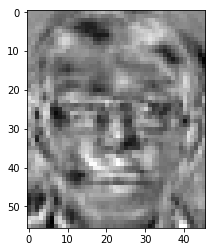

(80, 1)
(2576, 80)
(2576, 1)


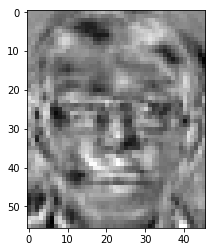

(80, 1)
(2576, 80)
(2576, 1)


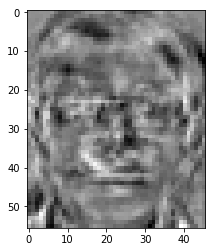

(80, 1)
(2576, 80)
(2576, 1)


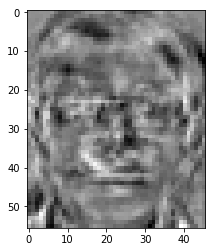

(80, 1)
(2576, 80)
(2576, 1)


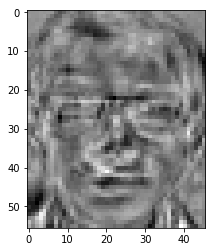

(80, 1)
(2576, 80)
(2576, 1)


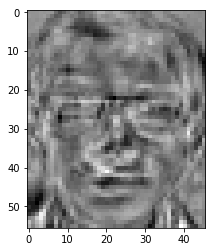

(80, 1)
(2576, 80)
(2576, 1)


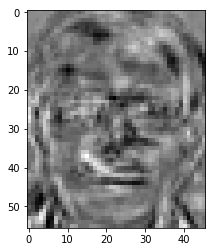

(80, 1)
(2576, 80)
(2576, 1)


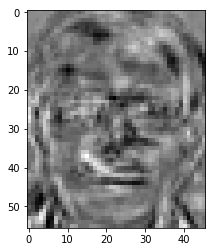

(80, 1)
(2576, 80)
(2576, 1)


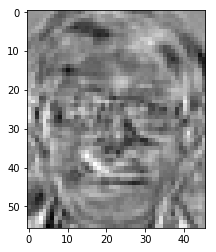

(80, 1)
(2576, 80)
(2576, 1)


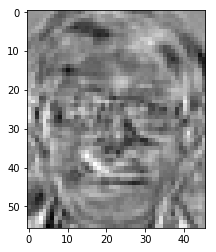

In [133]:
for i in range(10):
    vec = np.absolute(lda_vec[:, [i]])
    print(vec.shape)
    vec = np.dot(eig_vec[:, :80], vec)
    print(eig_vec[:, :80].shape)
    print(vec.shape)
    vec = np.reshape(vec, data[0, 0].shape)
    plt.imshow(vec, cmap='gray')
    plt.show()

## T24

Minimum threshold: 0.33593059932563957
Maximum threshold: 15.979512611231923
---------------------------------------------
EER: 0.08214285714285718
---------------------------------------------
Recall at 0.1% False Alarm Rate: 0.5035714285714286
---------------------------------------------


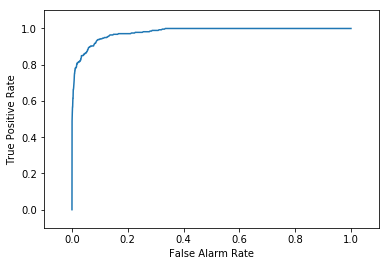

In [103]:
lda_T = np.dot(eig_T, np.absolute(lda_vec[:, :10]))
lda_D = np.dot(eig_D, np.absolute(lda_vec[:, :10]))

lda_T_list = [lda_T[i, :] for i in range(lda_T.shape[0])]
lda_D_list = [lda_D[i, :] for i in range(lda_D.shape[0])]

lda_sim = similarity(lda_T_list, lda_D_list)
plot_roc(eig_sim)